### 선형회귀 특성

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC3/blob/main/gg-31-선형회귀특성.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC3/blob/main/gg-31-선형회귀특성.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression, Ridge

#### Genrating Regression Dataset
* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

In [ ]:
from sklearn.datasets import make_regression
X,Y = make_regression(n_features=1, noise=10, n_samples=1000)

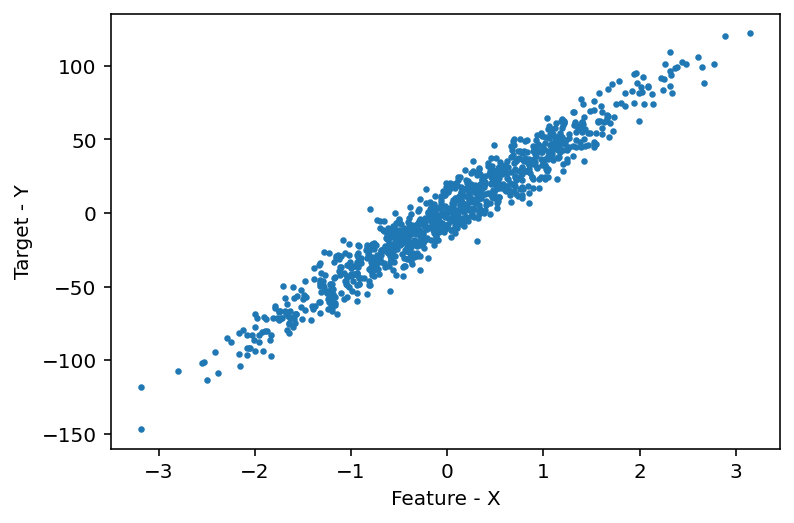

In [ ]:
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.scatter(X,Y,s=5)

In [ ]:
lr = LinearRegression()
lr.fit(X,Y)
lr.coef_, lr.intercept_

(array([40.49722778]), 0.04428243303849522)

### Predicting using trained model

In [ ]:
pred = lr.predict(X)

* Blue dots represent maps to actual target data
* Orange dots represent predicted data 

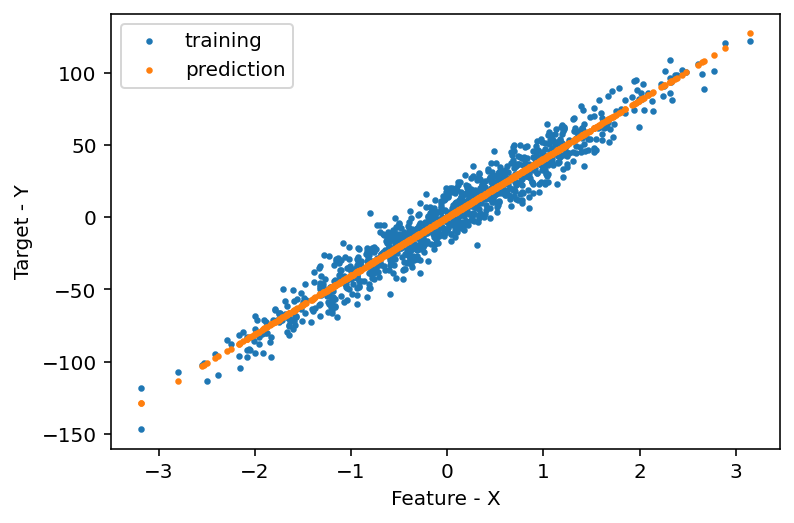

In [ ]:
plt.scatter(X,Y,s=5, label='training')
plt.scatter(X,pred,s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - Y')
plt.legend()
plt.show()

## 3. Regularized Regression Methods 
![](img/3.RegressionTechniques-01.jpg)

### Ridge Regression
* Ridge Regression imposes penalty on size of coef.
* Less impacted by outliers.

#### Adding outliers to data

### Ridge
- w = Error 항 + alpha*(wight**2)
- alpha 값이 커질수록 weight 값의 크기를 더욱 작게 제한하게 된다.

In [ ]:
ridge = Ridge(alpha=.1)
lr = LinearRegression()
ridge.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])
lr.fit([[0, 0], [0, 0], [1, 1]],  [0, .1, 1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ridge.coef_

array([0.44186047, 0.44186047])

In [ ]:
lr.coef_

array([0.475, 0.475])

### 일부 데이터 변형
- Y[950: -1] - 600

In [ ]:
outliers = Y[950:] - 600

In [ ]:
import numpy as np
Y_Out = np.append(Y[:950],outliers)

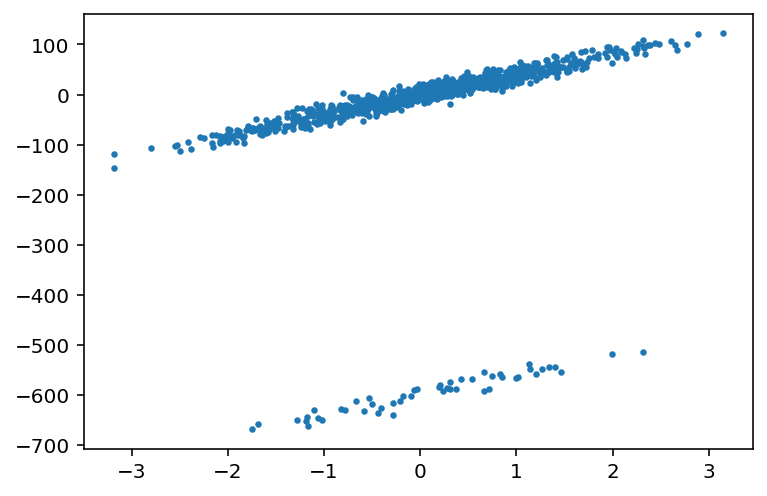

In [ ]:
plt.scatter(X,Y_Out,s=5)

In [ ]:
lr = LinearRegression()

lr.fit(X,Y_Out)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred_Out = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

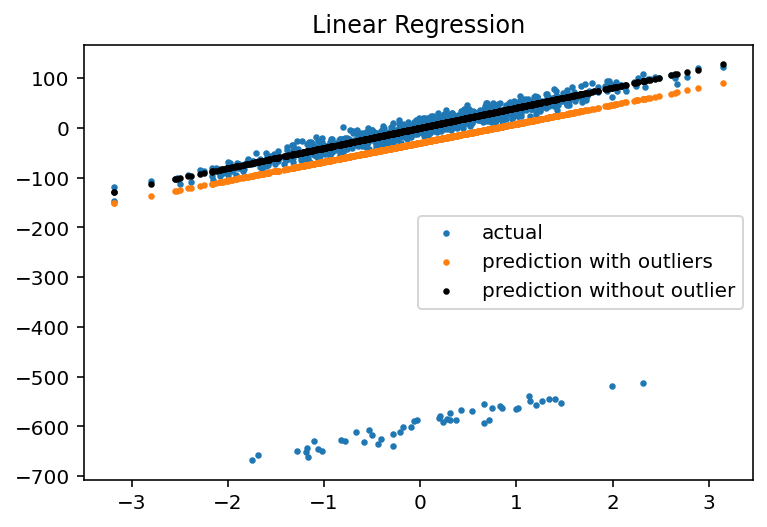

In [ ]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5,label='prediction with outliers')
plt.scatter(X,pred,s=5,c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

In [ ]:
lr.coef_

array([38.031202])

- alpha 값이 커질수록 규제 강해진다. (w값이 작아진다.)

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1000)
ridge.fit(X,Y_Out)
pred_ridge = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

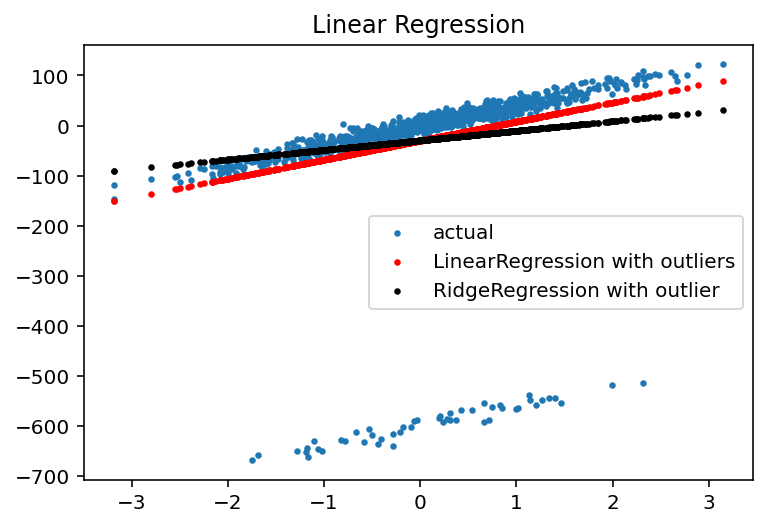

In [ ]:
plt.scatter(X,Y_Out,s=5,label='actual')
plt.scatter(X,pred_Out,s=5, c='r' ,label='LinearRegression with outliers')
plt.scatter(X,pred_ridge,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [ ]:
ridge.coef_

array([19.129406])

## 교재 p.247 ---- 여기 까지

### Effects of alpha using Ridge on Coeficients 
* Data generation

In [ ]:
X, y, w = make_regression(n_samples=10, n_features=10, coef=True,
                          random_state=1, bias=3.5)

In [ ]:
w

array([80.71051956, 10.74941291, 38.78606441, 13.64552257,  5.99176895,
       86.35418546, 12.13434557,  4.45518785, 74.71216427, 55.6240234 ])

### Training Ridge for different values of alpha
* Coefs calculated are appended to a list
* Generate 20 alphas from 10^-6 to 10^6

In [ ]:
alphas = np.logspace(-6, 6, 200)
alphas[:20]

array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05])

In [ ]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

#### Plotting alphas & coefs
* Different colors represents different coefs

#### Conclusion
* As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
* For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

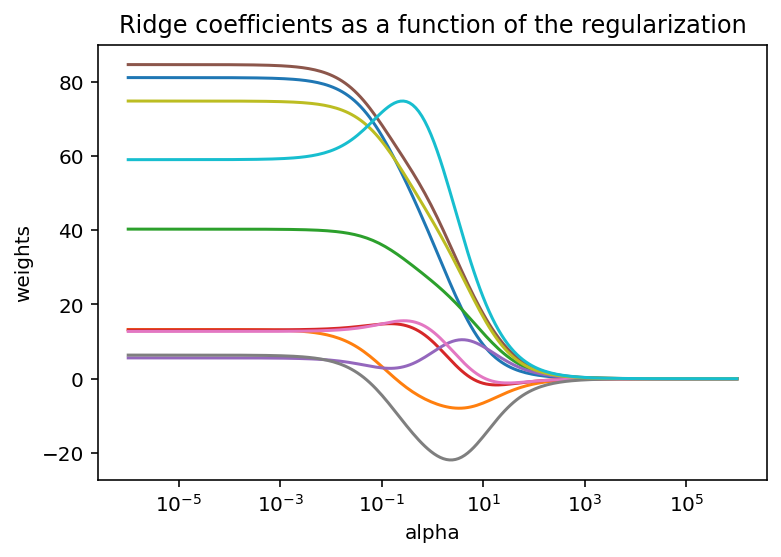

In [ ]:
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()